In [1]:
# !pip install opencv-python
import cv2 
from matplotlib import pyplot as plt 
from ultralytics import YOLO
import numpy as np
import pandas as pd
import easyocr
# from plater import plateRecognize

In [2]:
model = YOLO('C:/Users/Harini/Documents/college/MTech_Thesis-Project/django_tailwind/src/model/bestTrain13.pt')

rf='mr'
reader = easyocr.Reader([rf])

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    # height, width, depth = im_data.shape

    figsize = im_data.shape[1] / float(dpi), im_data.shape[0] / float(dpi)

    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()

# YOLO License Plate Detection

In [4]:

def detect_rec(img, show_figures=False):
    H, W, _ = img.shape
    results = model.predict(img, conf=0.5)
    # bboxes, class_ids, confidences
    bbox = None
    number = []
    print('Detections are ',results)

    bbox = results[0].boxes.xyxy.tolist()
    print('BBOX ISSSS',bbox)
    if len(bbox) == 0:
        return None
    xs, ys, xe, ye = bbox[0]
    xs, ys, xe, ye = round(xs), round(ys), round(xe), round(ye)
    bbox = (xs, ys, xe, ye)
    img = cv2.rectangle(img,
                        (xs, ys),
                        (xe, ye),
                        (0, 255, 0),
                        4)
    # plt.figure()
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    license_plate = img[ys:ye, xs:xe].copy()
    return license_plate


0: 640x480 1 License, 232.9ms
Speed: 10.3ms preprocess, 232.9ms inference, 629.9ms postprocess per image at shape (1, 3, 640, 480)
Detections are  [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'License'}
obb: None
orig_img: array([[[ 49,  64,  73],
        [ 53,  68,  77],
        [ 48,  65,  74],
        ...,
        [ 12,  51,  49],
        [ 24,  63,  61],
        [ 20,  59,  57]],

       [[ 50,  65,  74],
        [ 48,  63,  72],
        [ 45,  62,  71],
        ...,
        [ 19,  58,  56],
        [ 26,  65,  63],
        [ 19,  58,  56]],

       [[ 49,  66,  75],
        [ 46,  63,  72],
        [ 50,  67,  76],
        ...,
        [ 24,  63,  61],
        [ 28,  68,  66],
        [ 10,  50,  48]],

       ...,

       [[117, 164, 196],
        [124, 171, 203],
        [146, 191, 224],
        ...,
        [ 99, 120, 152],
        [114, 135, 167],
        [136, 157, 189]],

 

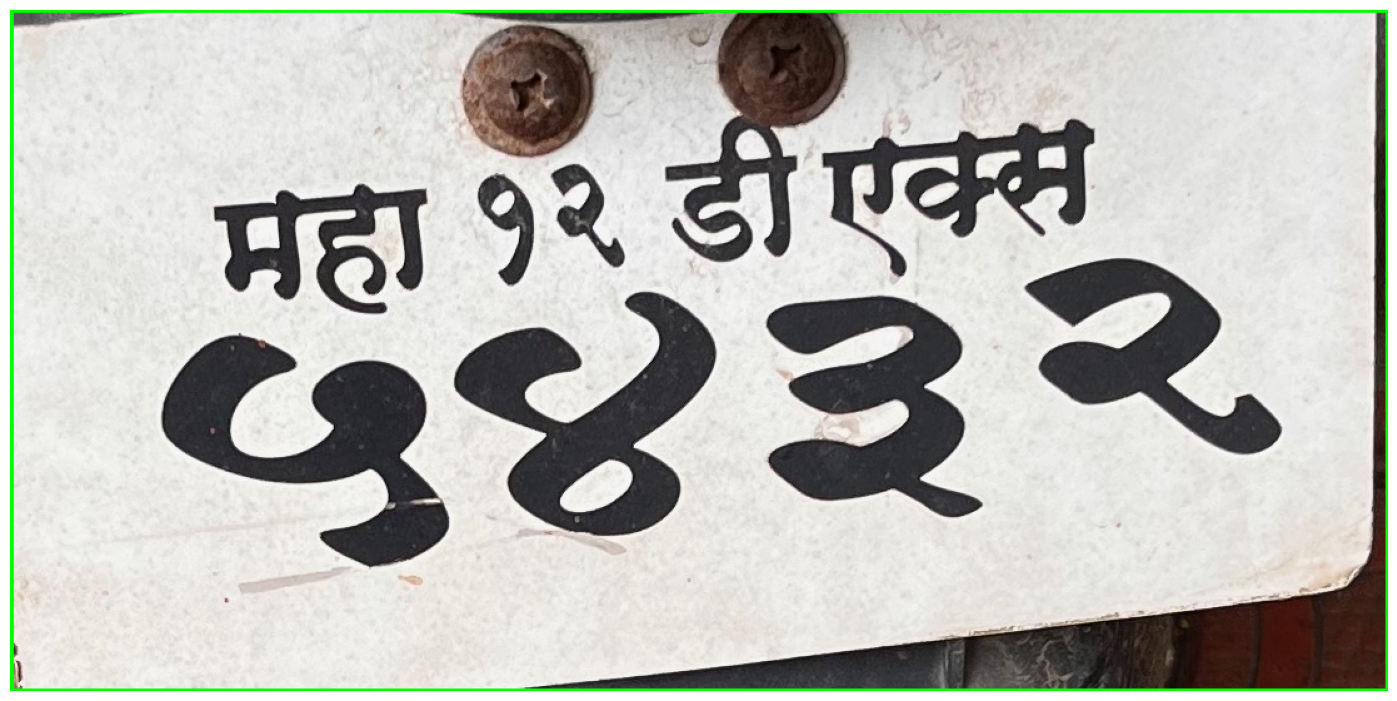

In [5]:
self_cropped_image = "lp_cropped.png"
fullImage = cv2.imread("working/IMG_9402_full.jpeg")
img = detect_rec(fullImage)
cv2.imwrite('img.png',img)
display('img.png')
if img is None:
    print('No Plate detected')

img_old = cv2.imread(self_cropped_image)
image_list = []

In [39]:
def testEasyOCR(path_name):
    number = []
    translatedNumber = []
    translations = {
        'महाराष्ट्र':'MH',
        'महा':'MH',
        '०':'0',
        '१':'1',
        '२':'2',
        '३':'3',
        '४':'4',
        '५':'5',
        '६':'6',
        '७':'7',
        '८':'8',
        '९':'9',
        'बी':'B',
        'च':'C',
        'डी':'D',
        'एच':'H',
        'ह':'H',
        'हा':'H',
        'के':'K',
        'म':'M', 
        'एम':'M', 
        'एन':'N',
        'न':'N',
        'पी':'P',
        'यु':'U',
        'ए्क्स':'X',
        'एक्स':'X',
    }
    if rf=='en':
        output = reader.readtext(path_name, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890',contrast_ths=0.3, batch_size=3)
    else:
        # output = reader.readtext(path_name,allowlist='६ २ ९ म हा रा ष्ट्र १ ए म बी', contrast_ths=0.3, batch_size=3)
        output = reader.readtext(path_name, contrast_ths=0.3, batch_size=3)
    

    for out in output:
        text_bbox, text, text_score = out
        print(text,text_score)
        if text_score > 0.2:
            number.append(text)
        # df.loc[len(df.index)] = [path_name,text,text_score]  
    '''
    
        ['६२९९', 'महाराष्ट्र १२', 'एम बी']
        ['6299', 'MH', '12', 'M', 'B']
    '''
    if not rf=='en':
        for i in number:
            tr1=[]
            if i.count(' ')>0:
                for j in i.split(' '):
                    if j in translations:
                        tr1.append(translations.get(j,''))
                    else:
                        tr = []
                        for k in j:
                            tr.append(translations.get(k,''))
                        tr1.append(''.join(tr))
            else:
                for j in i:
                    if j in translations:
                        tr1.append(translations.get(j,''))
                    else:
                        tr = []
                        for k in j:
                            tr.append(translations.get(k,''))
                        tr1.append(''.join(tr))
            translatedNumber.append(''.join(tr1))
            # if 
    print(number)
    print(translatedNumber)
   

In [7]:
testEasyOCR(img)

डी एक्स 0.5201446538304851
१२ 0.8671139109600909
महा 0.9257901906967163
५४३२ 0.9957683682441711
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', '', '5432']


In [8]:
# display(self_cropped_image)

Inverted Images

<H1>NOT GOOD</H1>

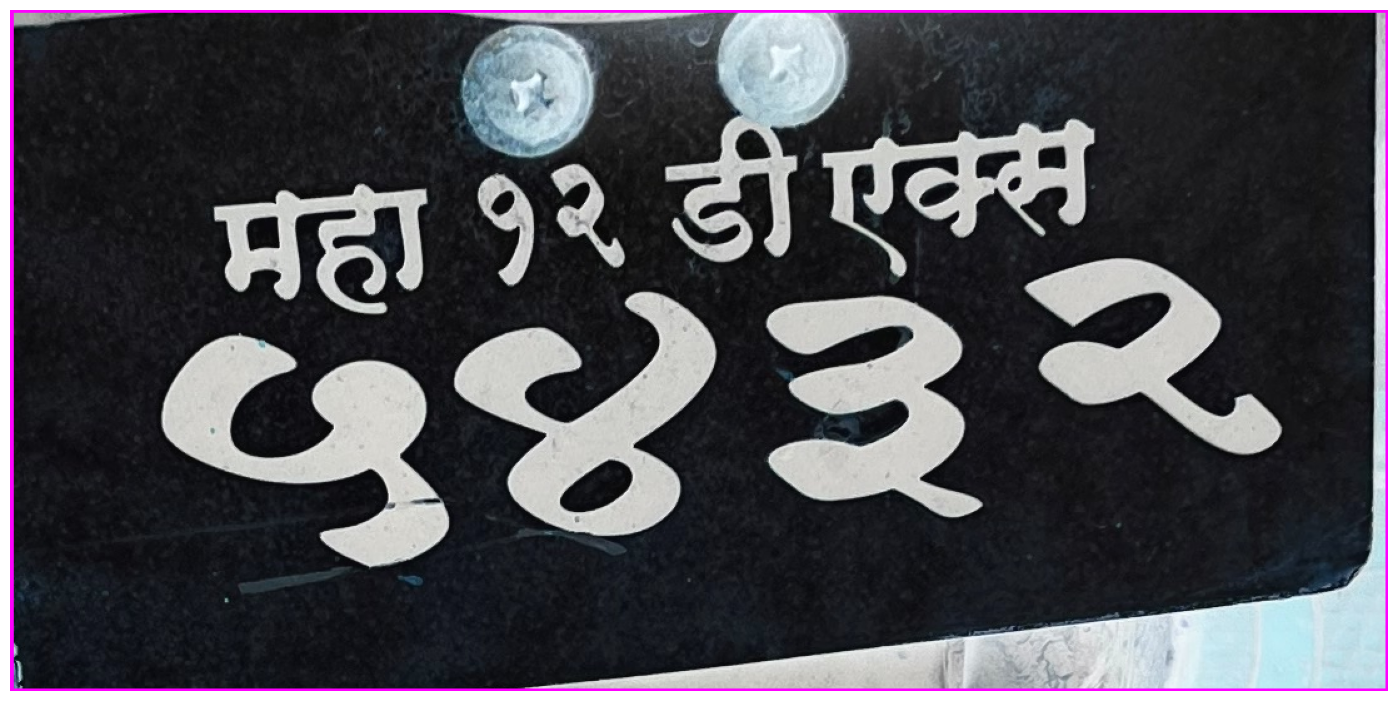

डी एक्स 0.581873852053736
१२ 0.9997118963007056
महा 0.9487942834694362
५४३२ 0.9118191599845886
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', '', '5432']
डी एक्स 0.6317360606279907
१२ 0.9995863958855625
महा 0.9489753935130111
५४३२ 0.6750532388687134
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', '', '5432']


In [9]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("inverted.png", inverted_image)
image_list.append("inverted.png")
display("inverted.png")
testEasyOCR(inverted_image)
testEasyOCR("inverted.png")



Rescaling -  optimised range, comes down to dpi, height of characters

Binarization - image should be in grayscale

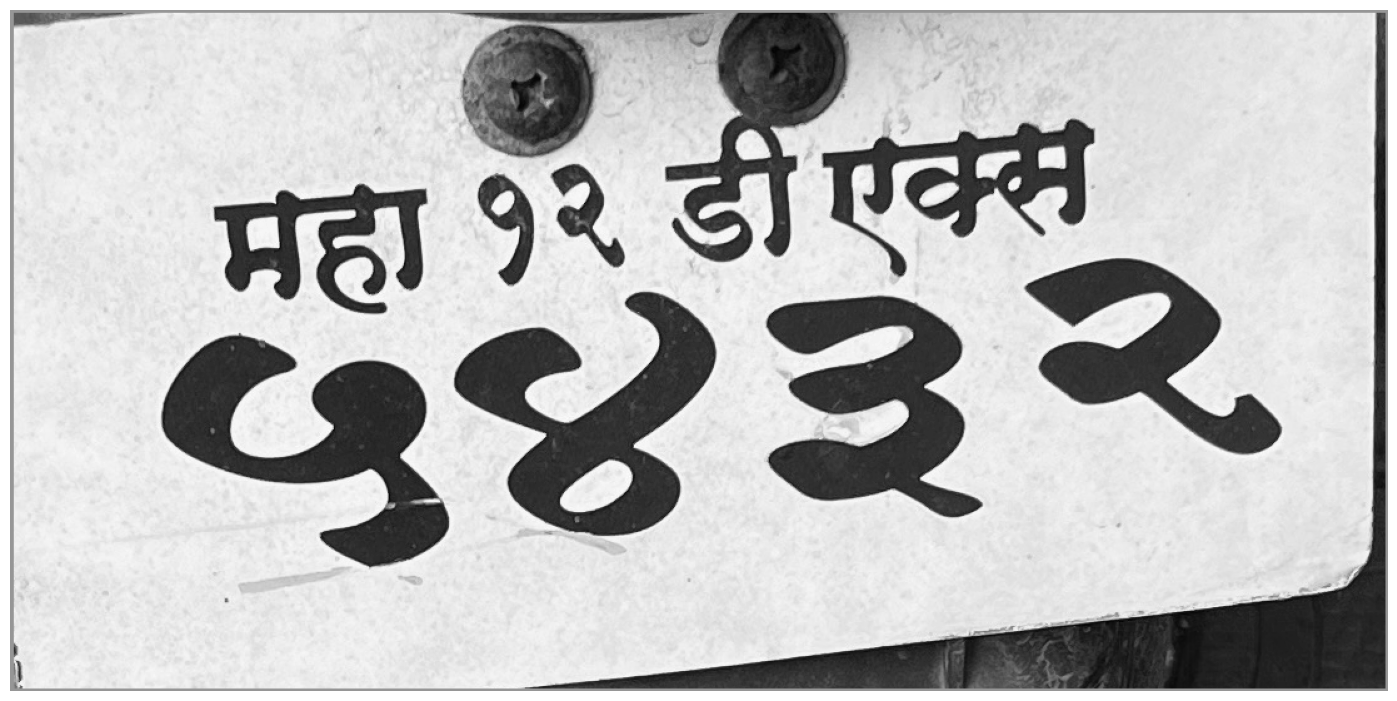

डी एक्स 0.7703134273123242
१२ 0.997585334580877
महा 0.9323690533638
५४३२ 0.7087695767231309
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', 'MH', '5432']
डी एक्स 0.7703134273123242
१२ 0.997585334580877
महा 0.9323690533638
५४३२ 0.7087695767231309
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', 'MH', '5432']


In [40]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv2.imwrite("gray_image.png", gray_image)
# print(gray_image.shape)
image_list.append("gray_image.png")
display("gray_image.png")
testEasyOCR(gray_image)
testEasyOCR("gray_image.png")



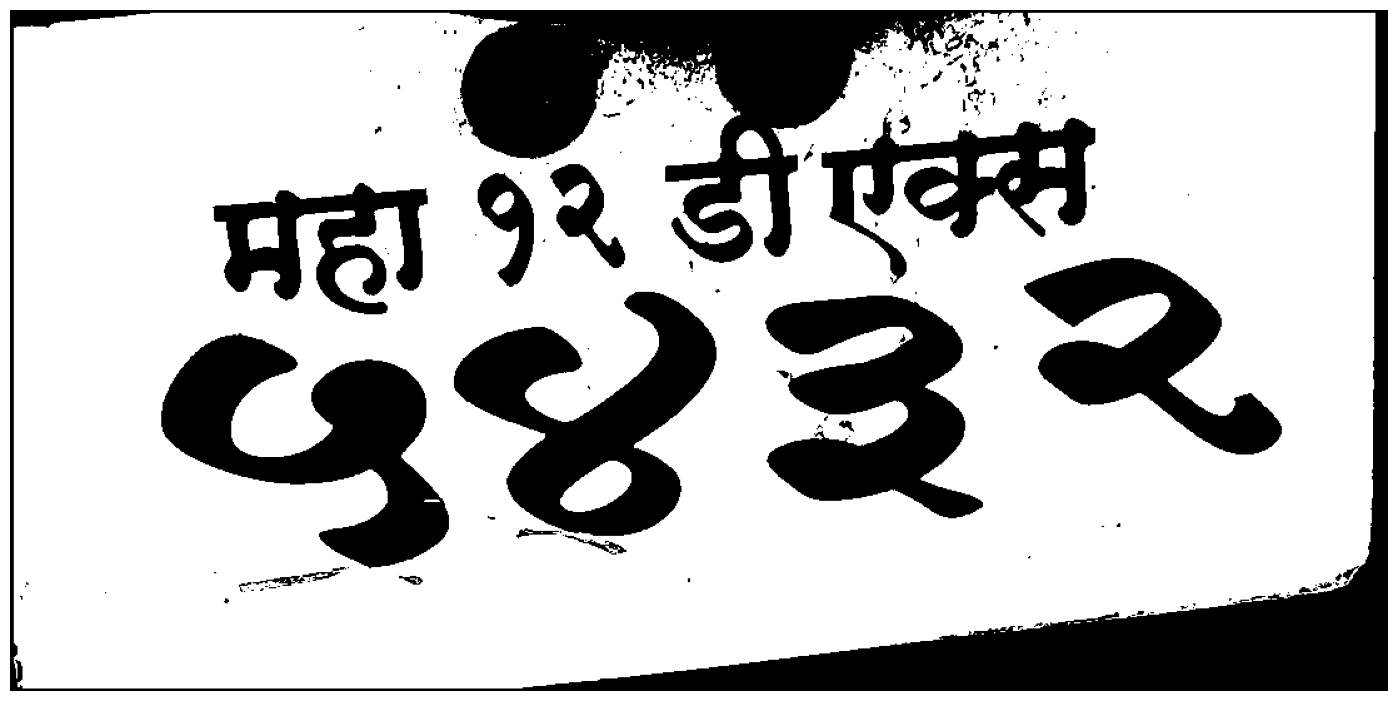

डी एक्स 0.6802588010676248
१२ 0.8690786495411328
पहा 0.38292566842502035
५४३२ 0.6710284168861678
['डी एक्स', '१२', 'पहा', '५४३२']
['DX', '12', '', '5432']
डी एक्स 0.6802588010676248
१२ 0.8690786495411328
पहा 0.38292566842502035
५४३२ 0.6710284168861678
['डी एक्स', '१२', 'पहा', '५४३२']
['DX', '12', '', '5432']


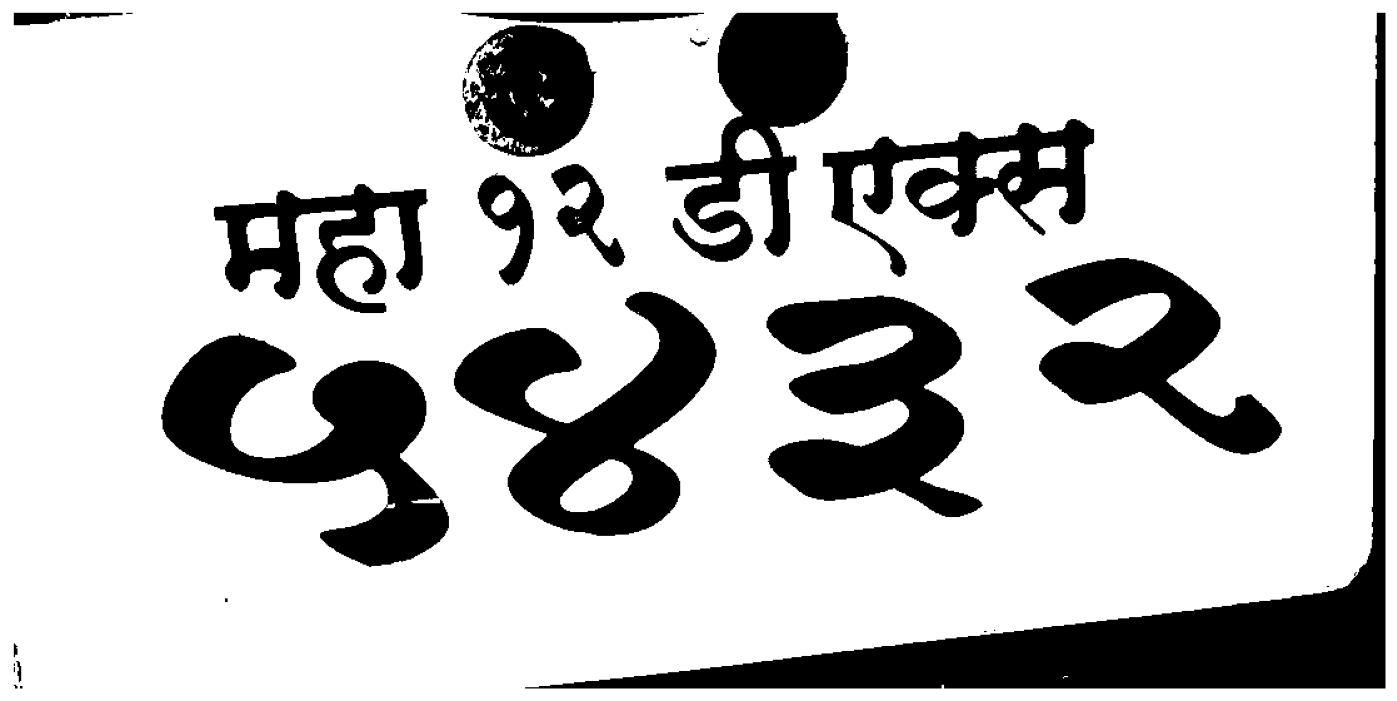

डी़ एक्स 0.36472558925217297
१२ 0.8687931688866251
पह 0.5702166104682609
५४३२ 0.4013321269052858
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.36472558925217297
१२ 0.8687931688866251
पह 0.5702166104682609
५४३२ 0.4013321269052858
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']


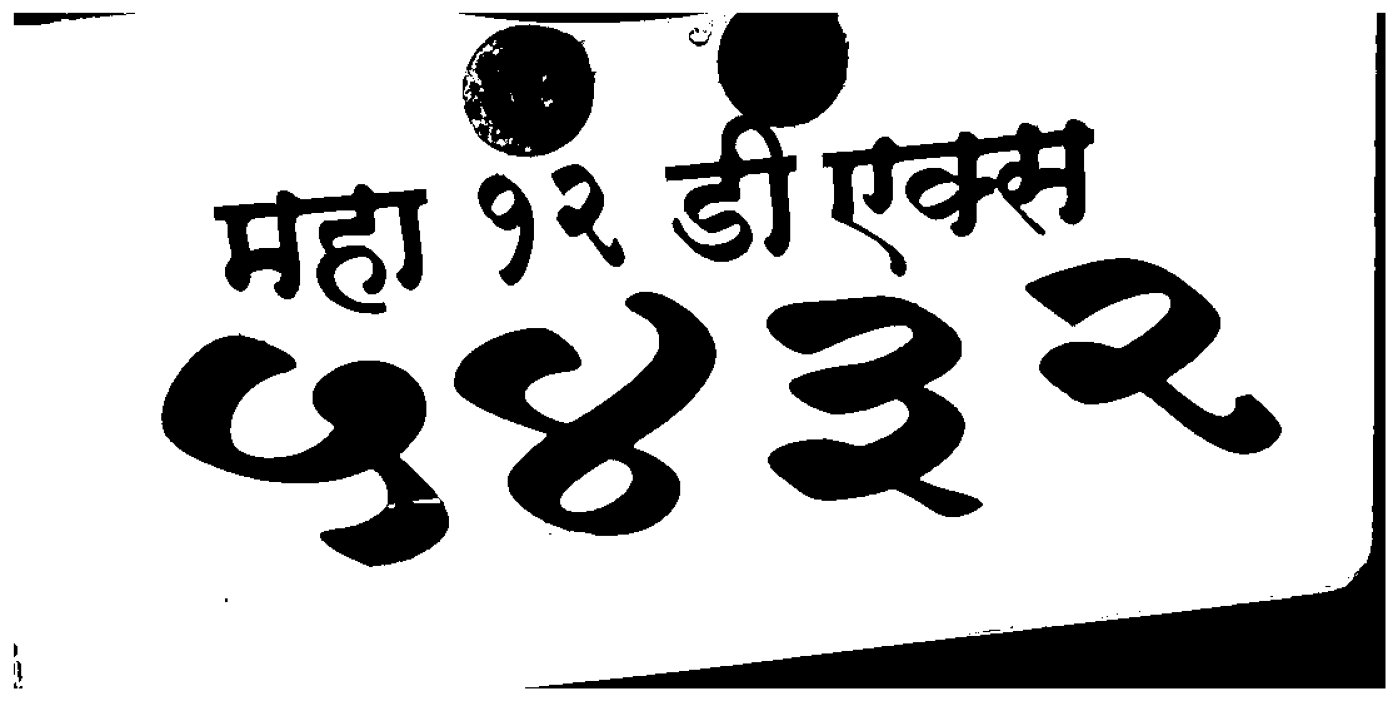

डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']


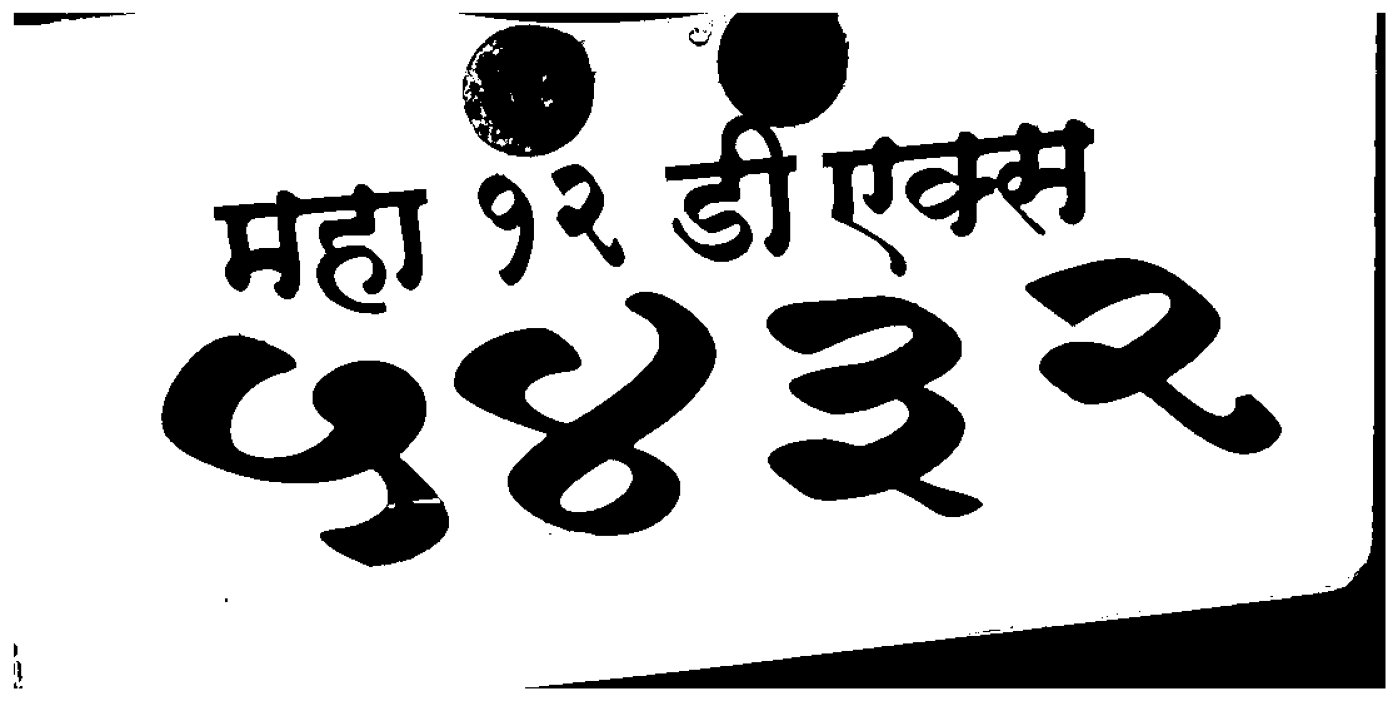

डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']


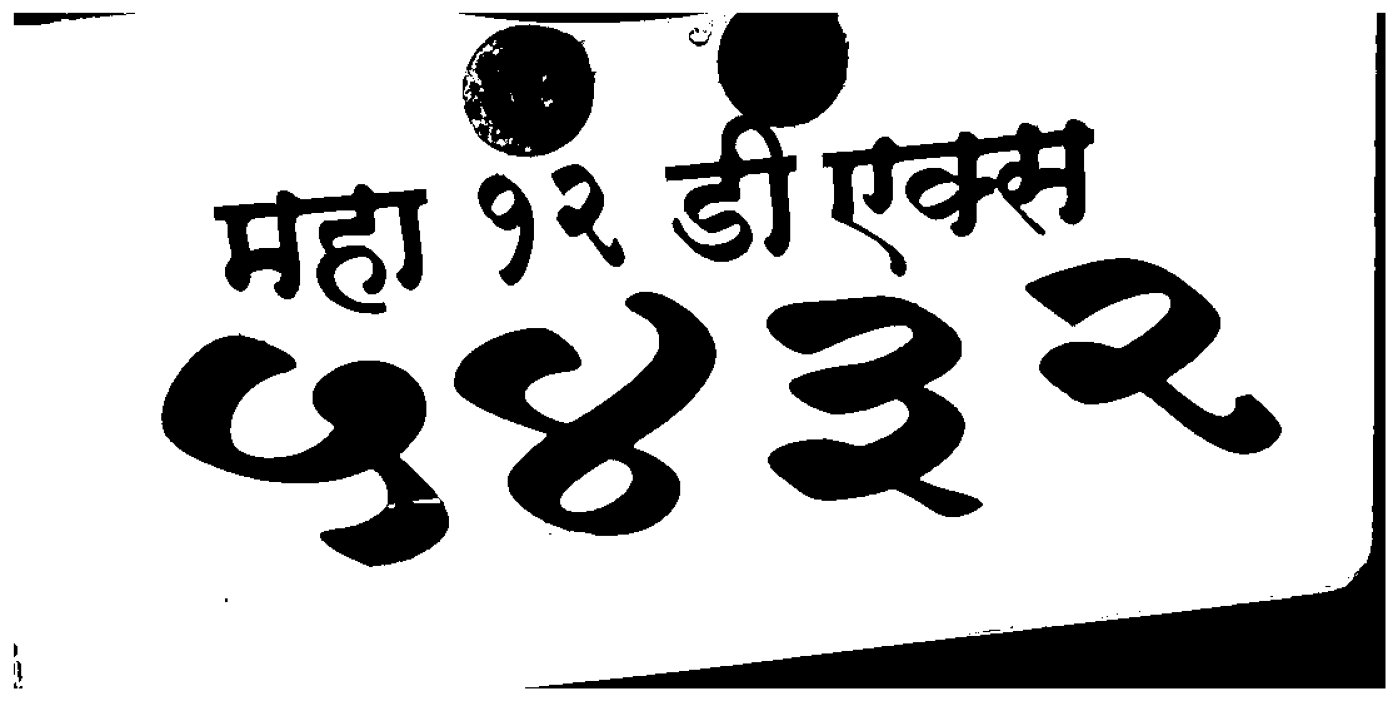

डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']


In [11]:
thresh, im_bw1 = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
thresh, im_bw2 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
thresh, im_otsu_og = cv2.threshold(gray_image, 64, 255, cv2.THRESH_OTSU)
thresh, im_otsu1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh, im_otsu2 = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite("im_bw1.png",im_bw1)
image_list.append("im_bw1.png")

cv2.imwrite("im_bw2.png",im_bw2)
image_list.append("im_bw2.png")

cv2.imwrite("im_otsu_og.png",im_otsu_og)
image_list.append("im_otsu_og.png")

cv2.imwrite("im_otsu1.png",im_otsu1)
image_list.append("im_otsu1.png")

cv2.imwrite("im_otsu2.png",im_otsu2)
image_list.append("im_otsu2.png")


display("im_bw1.png")
# display(im_bw1)
testEasyOCR("im_bw1.png")
testEasyOCR(im_bw1)


display("im_bw2.png")
# display(im_bw2)
testEasyOCR("im_bw2.png")
testEasyOCR(im_bw2)


display("im_otsu_og.png")
# display(im_otsu_og)
testEasyOCR("im_otsu_og.png")
testEasyOCR(im_otsu_og)


display("im_otsu1.png")
# display(im_otsu1)
testEasyOCR("im_otsu1.png")
testEasyOCR(im_otsu1)


display("im_otsu2.png")
# display(im_otsu2)
testEasyOCR("im_otsu2.png")
testEasyOCR(im_otsu2)





Noise removal 

In [12]:
def noise_removal(image):
    kernel1 = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel1, iterations=1)
    kernel2 = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel2, iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE, kernel2)
    image = cv2.medianBlur(image,3)
    return (image)

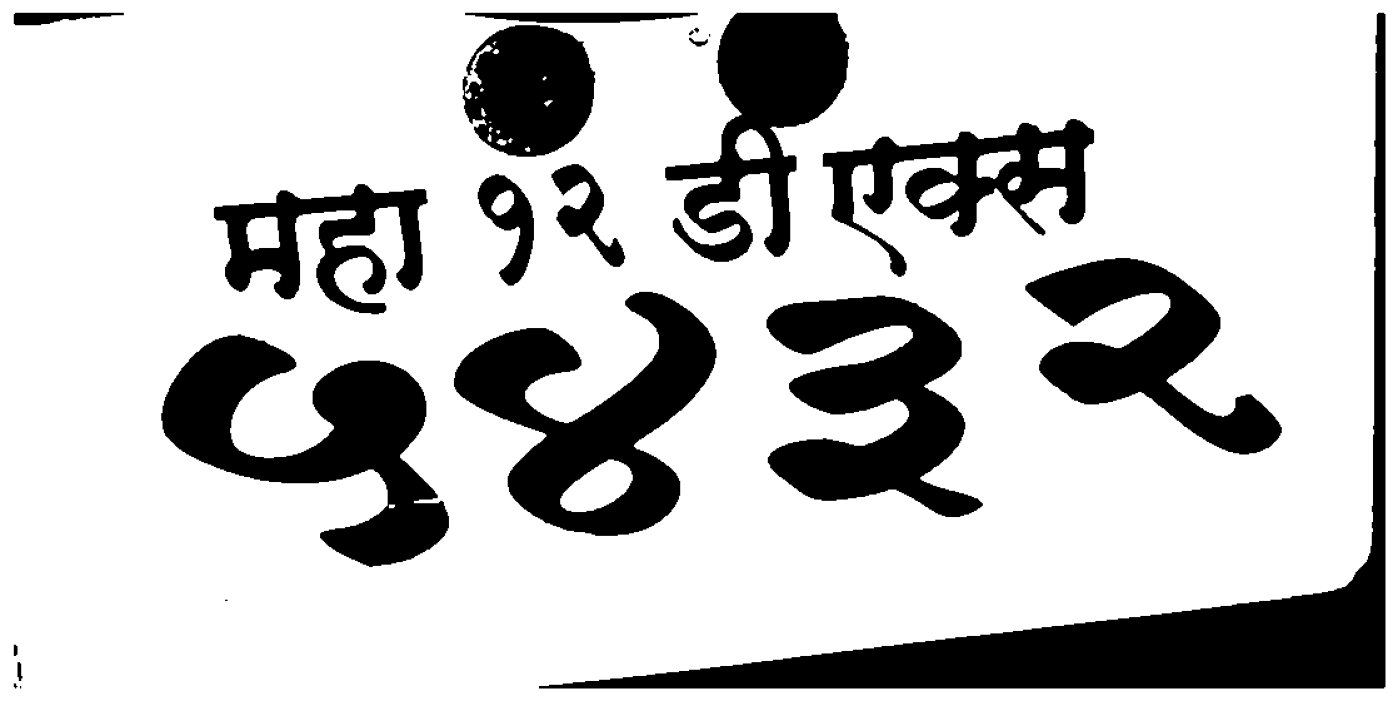

डी़ एक्स 0.4985955845837464
१२ 0.9733584286476722
पह 0.5568205244474683
५४३२ 0.9947174191474915
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']


In [13]:
no_noise = noise_removal(im_otsu_og)
cv2.imwrite("no_noise.png", no_noise)
display("no_noise.png")
image_list.append("no_noise.png")
testEasyOCR(no_noise)



In [14]:
# display("im_bw1.png")
# display("nonoise.png")

Erosion and dilation

In [15]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return image    

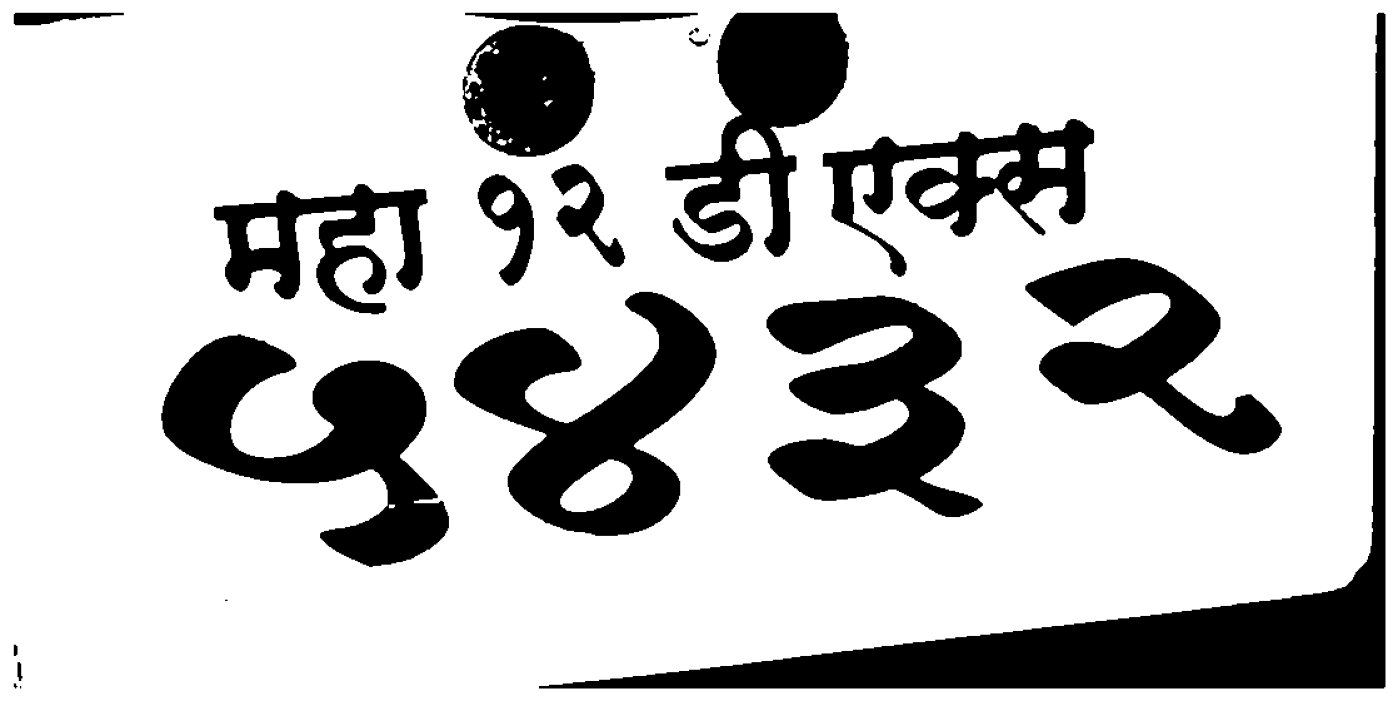

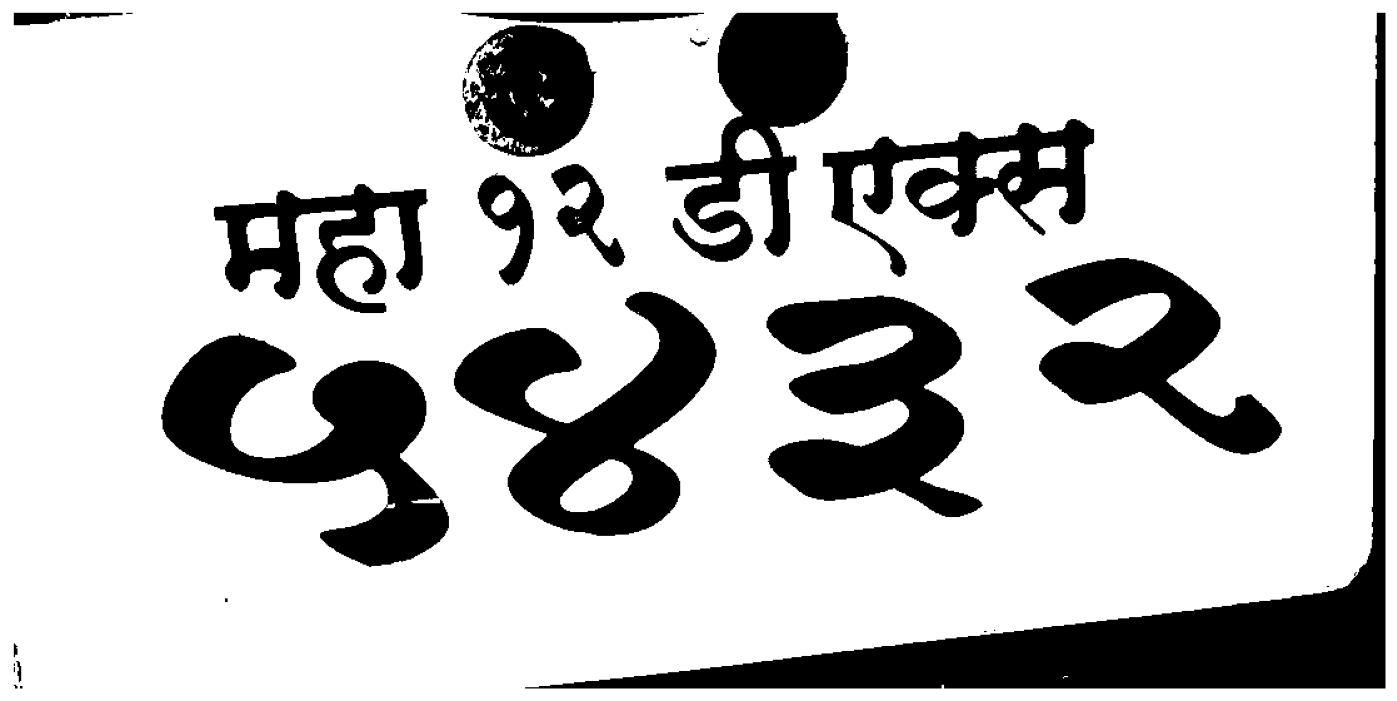

In [16]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_no_noise.png",eroded_image)
image_list.append("eroded_no_noise.png")
display("eroded_no_noise.png")
eroded_image = thin_font(im_bw2)
cv2.imwrite("eroded_otsu_og.png",eroded_image)
image_list.append("eroded_otsu_og.png")
display("eroded_otsu_og.png")



# display("eroded.png")

Dilated image - not working 

In [17]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return image  

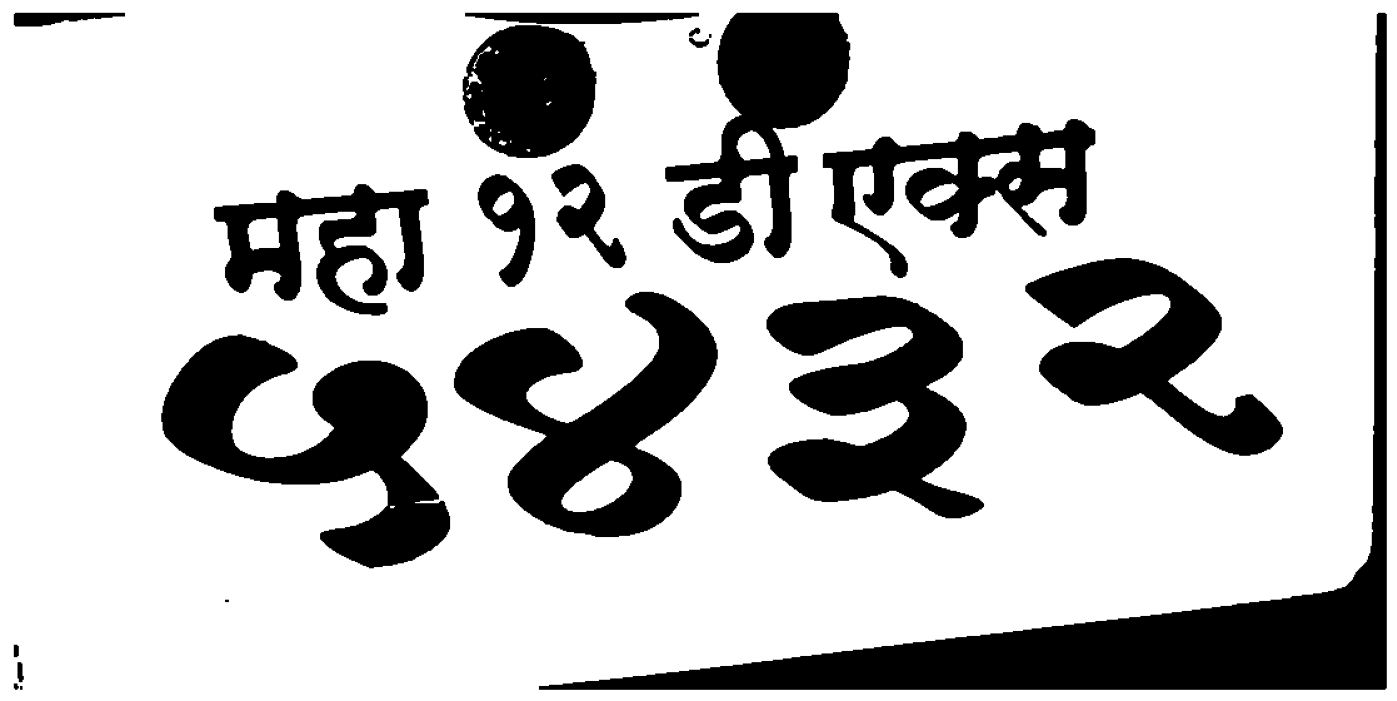

In [18]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated.png",dilated_image)
image_list.append("dilated.png")

display("dilated.png")

Rotation / Deskewing

In [19]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    # gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(cvImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("boxes.png", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [20]:
def deskew(CVimage):
    angle = getSkewAngle(CVimage)
    return rotateImage(CVimage, -1.0 * angle)

In [21]:
# display("yolo_cropped.png")

In [22]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

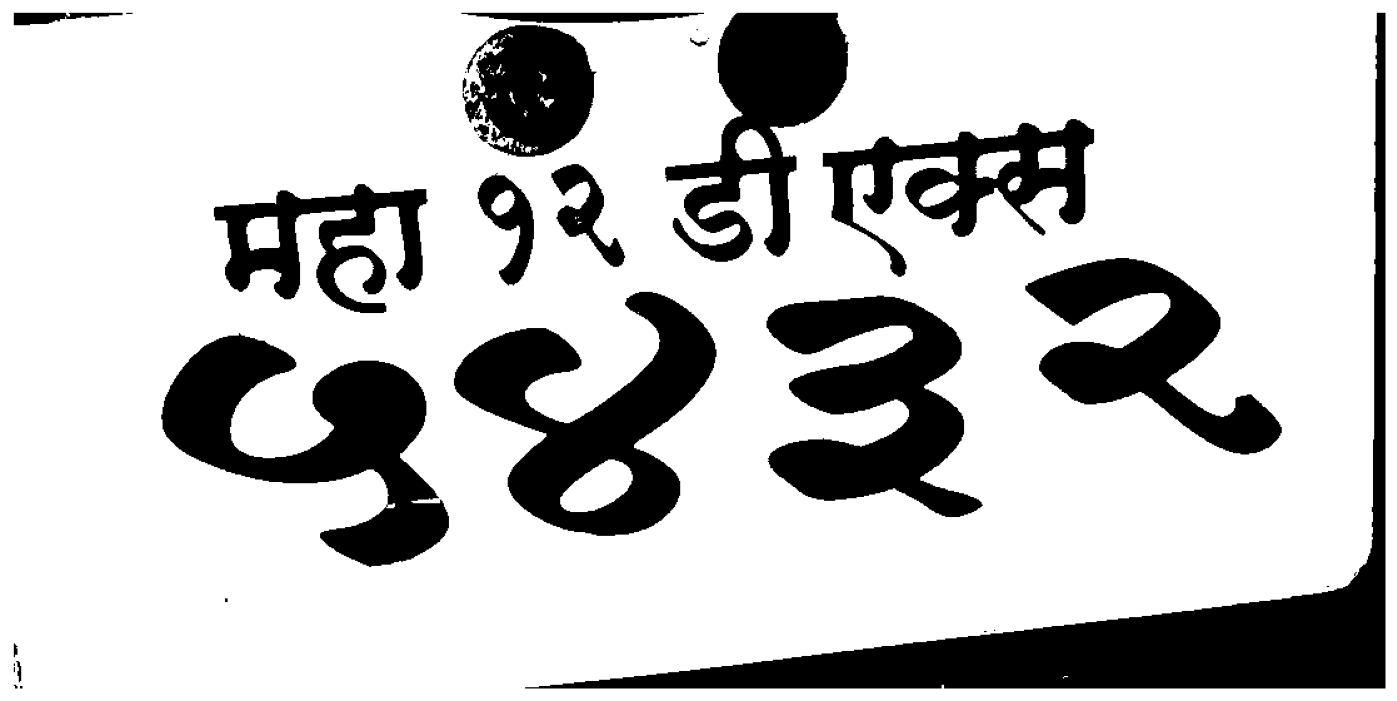

In [23]:
no_borders = remove_borders(eroded_image)
cv2.imwrite("no_borders.png", no_borders)
image_list.append("no_borders.png")

display('no_borders.png')

In [24]:
color = [255, 255, 255]
top, bottom, left, right = [15]*4

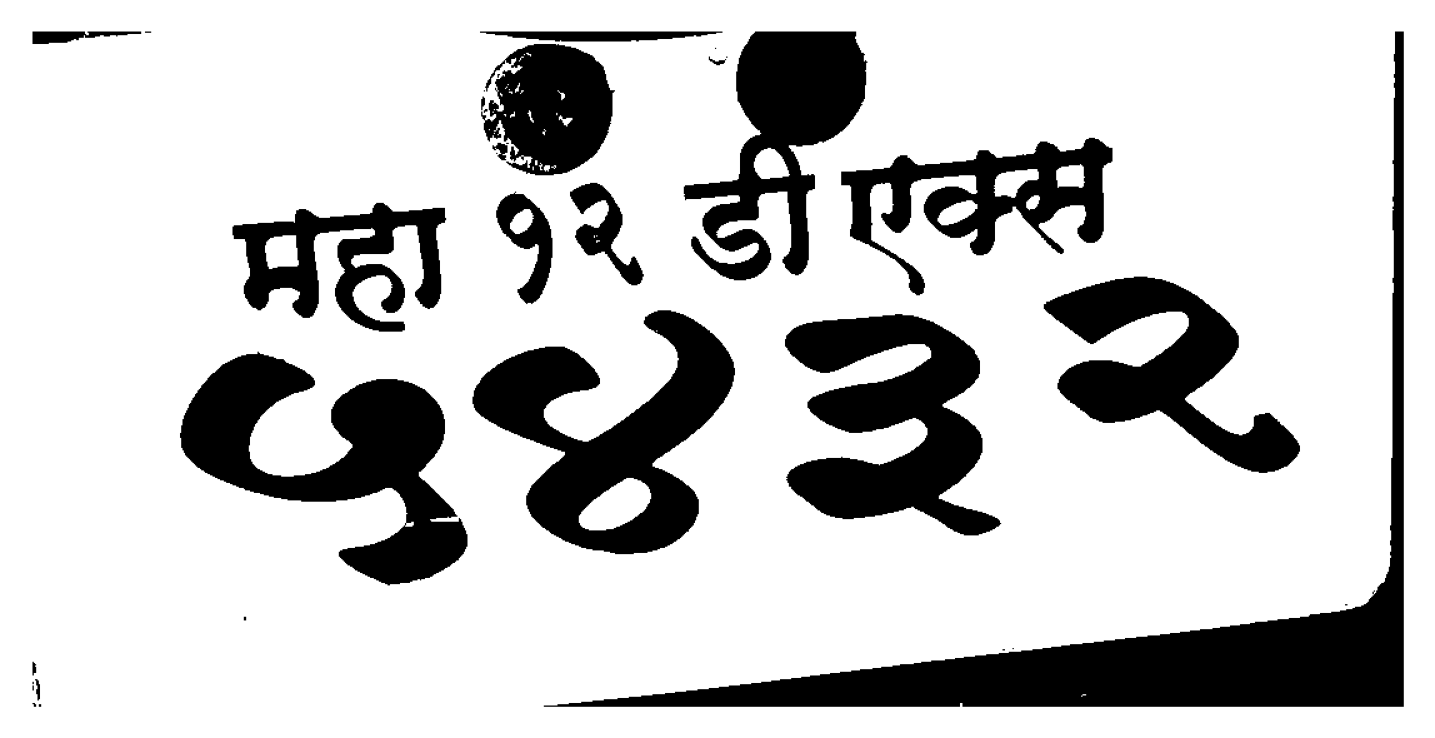

In [25]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("image_with_border.png", image_with_border)
image_list.append("image_with_border.png")
display("image_with_border.png")

16


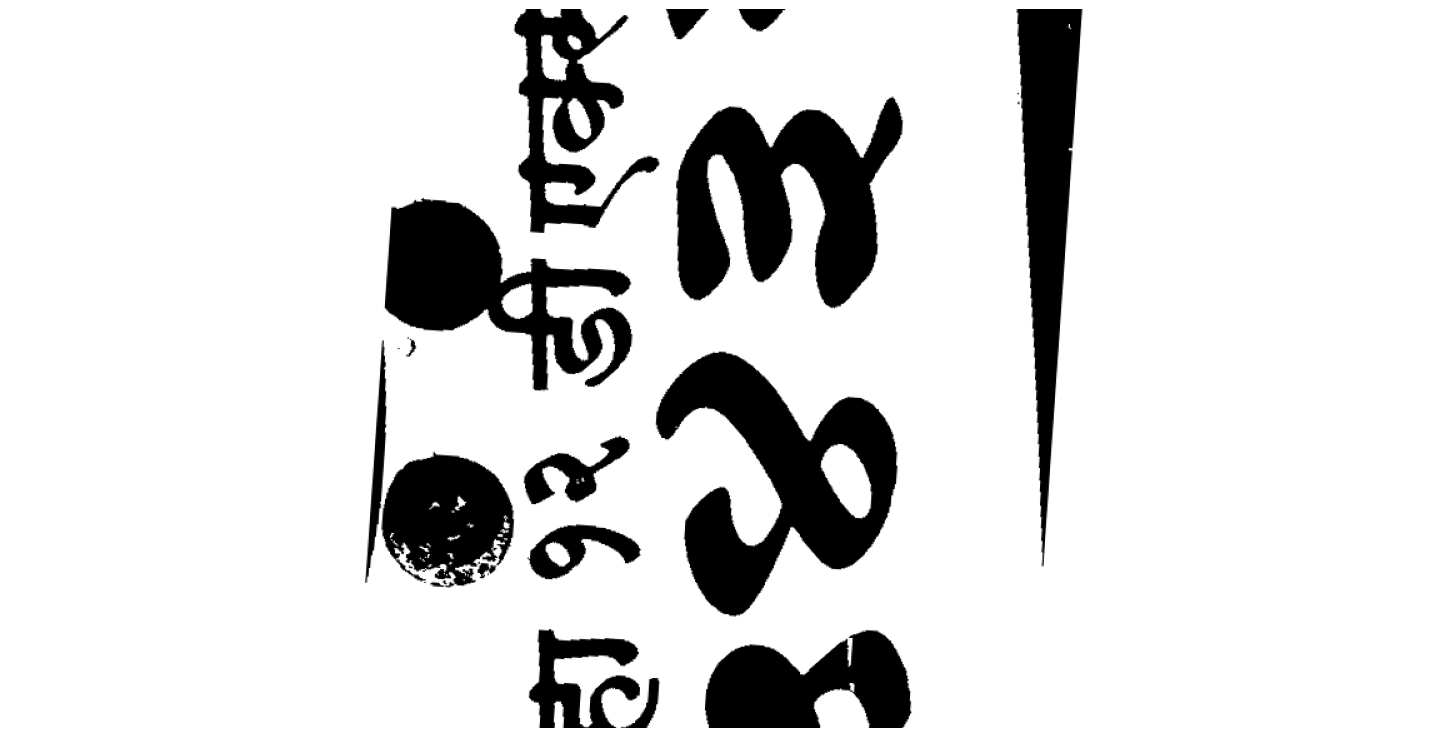

In [26]:
deskewed = deskew(image_with_border)
cv2.imwrite("deskewed.png",deskewed)
image_list.append("deskewed.png")

display("deskewed.png")

In [27]:
print(image_list)

['inverted.png', 'gray_image.png', 'im_bw1.png', 'im_bw2.png', 'im_otsu_og.png', 'im_otsu1.png', 'im_otsu2.png', 'no_noise.png', 'eroded_no_noise.png', 'eroded_otsu_og.png', 'dilated.png', 'no_borders.png', 'image_with_border.png', 'deskewed.png']


In [28]:
results = {}
df = pd.DataFrame(results, columns=['Image_name', 'Text', 'Confidence score'])
# new_df = pd.read_csv('Users.csv')
df
# print(new_df)

Empty DataFrame
Columns: [Image_name, Text, Confidence score]
Index: []

In [29]:
# def testEasyOCR(path_name):
#     number = []
#     output = reader.readtext(path_name, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890',contrast_ths=0.3, batch_size=3)

#     for out in output:
#         text_bbox, text, text_score = out
#         print(text,text_score)
#         if text_score > 0.5:
#             number.append(text)
#         df.loc[len(df.index)] = [path_name,text,text_score]  
        
#     print(number)
    

In [30]:
for p in image_list:
    testEasyOCR(p)
df.to_csv('results.csv', mode='a',sep='\t', index=True, header=True)

डी एक्स 0.6317360606279907
१२ 0.9995863958855625
महा 0.9489753935130111
५४३२ 0.6750532388687134
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', '', '5432']
डी एक्स 0.7703134273123242
१२ 0.997585334580877
महा 0.9323690533638
५४३२ 0.7087695767231309
['डी एक्स', '१२', 'महा', '५४३२']
['DX', '12', '', '5432']
डी एक्स 0.6802588010676248
१२ 0.8690786495411328
पहा 0.38292566842502035
५४३२ 0.6710284168861678
['डी एक्स', '१२', 'पहा', '५४३२']
['DX', '12', '', '5432']
डी़ एक्स 0.36472558925217297
१२ 0.8687931688866251
पह 0.5702166104682609
५४३२ 0.4013321269052858
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.9940553903579712
['डी़ एक्स', '१२', 'पह', '५४३२']
['X', '12', '', '5432']
डी़ एक्स 0.5153367011146586
१२ 0.9245360857097926
पह 0.5244844086584943
५४३२ 0.99

In [31]:
print(image_list)


['inverted.png', 'gray_image.png', 'im_bw1.png', 'im_bw2.png', 'im_otsu_og.png', 'im_otsu1.png', 'im_otsu2.png', 'no_noise.png', 'eroded_no_noise.png', 'eroded_otsu_og.png', 'dilated.png', 'no_borders.png', 'image_with_border.png', 'deskewed.png']


EasyOCR

In [32]:
# output = reader.readtext("yolo_cropped.png", allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890',contrast_ths=0.3, batch_size=3)

# for out in output:
#     text_bbox, text, text_score = out
#     print(text,text_score)
#     if text_score > 0.5:
#         number.append(text)
 
# print(number)